In [1]:
%matplotlib inline

import glob
from obspy.core import read

In [2]:
singlechannel = read("./5_trace.mseed")

In [3]:
print(singlechannel)

5 Trace(s) in Stream:
BK.BDM.00.LHE | 2015-09-16T22:54:31.069536Z - 2015-09-17T00:54:30.069536Z | 1.0 Hz, 7200 samples
BK.BDM.00.LHN | 2015-09-16T22:54:31.069538Z - 2015-09-17T00:54:30.069538Z | 1.0 Hz, 7200 samples
BK.BDM.00.LHZ | 2015-09-16T22:54:31.069536Z - 2015-09-17T00:54:30.069536Z | 1.0 Hz, 7200 samples
BK.BKS.00.LHE | 2015-09-16T22:54:31.069538Z - 2015-09-17T00:54:30.069538Z | 1.0 Hz, 7200 samples
BK.BKS.00.LHN | 2015-09-16T22:54:31.069538Z - 2015-09-17T00:54:30.069538Z | 1.0 Hz, 7200 samples


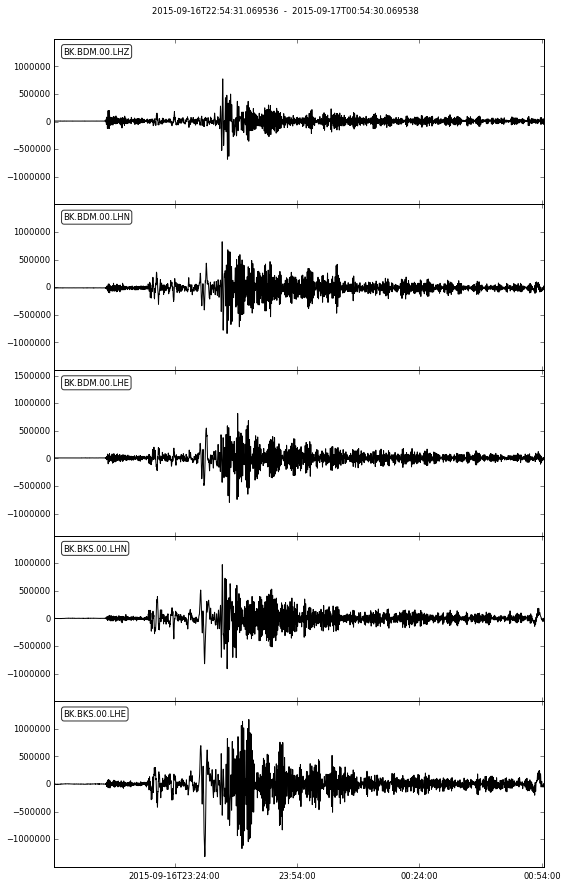

In [4]:
singlechannel.plot()

In [5]:
from bokeh.plotting import figure, output_file, output_server, show, vplot, hplot
from bokeh.models import CustomJS, ColumnDataSource

x1 = list(range(0,7200))
y1 = singlechannel[0].data

x2 = list(range(0,7200))
y2 = singlechannel[1].data

x3 = list(range(0,7200))
y3 = singlechannel[2].data

x4 = list(range(0,7200))
y4 = singlechannel[3].data

x5 = list(range(0,7200))
y5 = singlechannel[4].data

In [9]:
# To a static file...
# And dear god, use the CDN option
output_file("lines.html",title="line plot of seismic data", mode='cdn')

In [8]:
output_file?

In [6]:
# Or to a server?
output_server("lines")

Using saved session configuration for http://localhost:5006/
To override, pass 'load_from_config=False' to Session


In [10]:
# create a new plot with a title and axis labels
s1 = ColumnDataSource(data=dict(x=x1,y=y1))
p1 = figure(title="Seismic trace plot 1 select", plot_width=600, plot_height=300
            ,tools = "box_select")
s2 = ColumnDataSource(data=dict(x=x2,y=y2))
p2 = figure(title="Seismic trace plot 2 select", plot_width=600, plot_height=300
           ,tools = "box_select")
p3 = figure(title="Seismic trace plot 3", x_axis_label='x', y_axis_label='y', plot_width=800, plot_height=300)
p4 = figure(title="Seismic trace plot 4", x_axis_label='x', y_axis_label='y', plot_width=800, plot_height=300)
p5 = figure(title="Seismic trace plot 5", x_axis_label='x', y_axis_label='y', plot_width=800, plot_height=300)

# add a line renderer with legend and line thickness
# p1.line(x1, y1, legend="Trace 1", line_width=0.2, line_color="red")
# p1.line('x','y',source=s1, line_width=0.2, line_color="red",alpha=0.6)
p1.circle('x','y',source=s1,alpha=0.6)
p2.circle('x','y',source=s2,alpha=0.6,line_color="green",fill_color="green")
# p2.line(x2, y2, legend="Trace 2", line_width=0.2, line_color = "green")
p3.line(x3, y3, legend="Trace 3", line_width=0.2, line_color = "black")
p4.line(x4, y4, legend="Trace 4", line_width=0.2, line_color = "orange")
p5.line(x5, y5, legend="Trace 5", line_width=0.2)

# Adding a feature to select a part of waveform and see it in a new figure
s1_watch = ColumnDataSource(data=dict(x=[],y=[]))
y_range = [max(singlechannel[0].data),min(singlechannel[0].data)]
p1_watch = figure(title="Seismic trace plot 1 watch", plot_width=600, plot_height=300, y_range=y_range)
# p1_watch.line('x','y',source=s1_watch, line_width=0.2,line_color="black")
p1_watch.circle('x','y',source=s1_watch,alpha=0.6)

s1.callback = CustomJS(args=dict(s1_watch=s1_watch), code="""
    var inds = cb_obj.get('selected')['1d'].indices;
    var d1 = cb_obj.get('data');
    var d2 = s1_watch.get('data');
    d2['x'] = []
    d2['y'] = []
    
    for (i=0; i<inds.length;i++) {
        d2['x'].push(d1['x'][inds[i]])
        d2['y'].push(d1['y'][inds[i]])
    }
    s1_watch.trigger('change');
""")
s2.callback = CustomJS(args=dict(s1_watch=s1_watch), code= """
    var inds = cb_obj.get('selected')['1d'].indices;
    var d1 = cb_obj.get('data');
    var d2 = s1_watch.get('data');
    d2['x'] = []
    d2['y'] = []
    
    for (i=0; i<inds.length;i++) {
        d2['x'].push(d1['x'][inds[i]])
        d2['y'].push(d1['y'][inds[i]])
    }
    s1_watch.trigger('change');
""")
layout = hplot(p1,p1_watch)
# show(layout)
# Put all figures in a vplot
p = vplot(layout,p2,p3,p4,p5)
# show the results
show(p)